In [1]:
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

tf.random.set_seed(777)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
model = models.load_model('./checkpoints/model.h5')

In [3]:
img_path = './data/Test/chalcopyrite/GOMCAM 20200824_1703120523_1.jpg'

img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (224, 224))

In [4]:
pred = model.predict(img[np.newaxis]/255.)

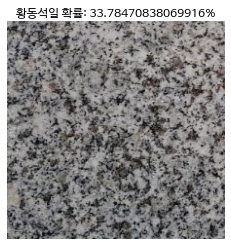

In [5]:
path = './fonts/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)
plt.imshow(img)
plt.axis('off')
plt.title(f"황동석일 확률: {pred[0, 0]*100}%", fontproperties=fontprop)
plt.show()